In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [4]:
train = pd.read_csv("/content/drive/MyDrive/Major Project/Dataset/train__dataset.csv")
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [5]:
train.shape

(18137, 18)

In [6]:
test = pd.read_csv("/content/drive/MyDrive/Major Project/Dataset/test___dataset.csv")
test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,1,0,65,2018,3,28,1,0,0,0,96.3,0
1,2,0,0,2,0,0,0,322,2018,12,9,0,0,0,0,52.0,0
2,1,0,2,3,0,0,0,115,2018,2,27,0,0,0,0,75.0,0
3,2,0,2,0,2,0,0,386,2018,10,23,1,0,0,0,115.0,1
4,2,0,1,4,0,0,1,51,2018,8,31,1,0,0,0,123.3,0


In [7]:
train.isnull().any()

no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [8]:
train.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


Text(0.5, 1.0, 'Pie chart showing the distribution of Booking Status into number of Cancellation/Non Cancellation ')

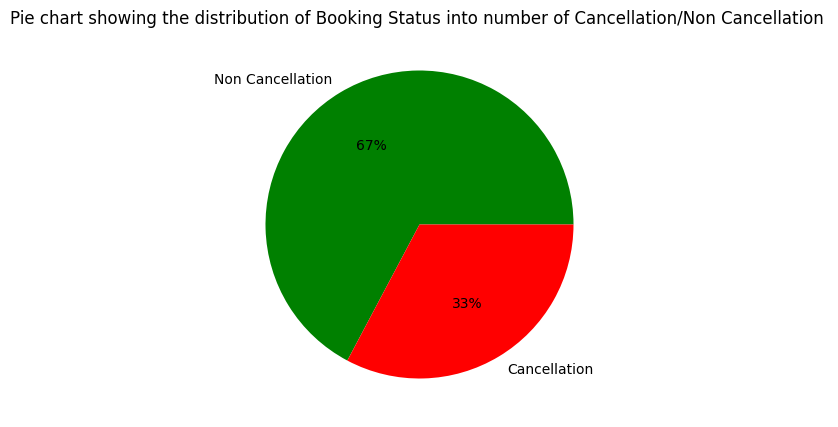

In [9]:
plt.figure(figsize = (5,5))
a = train['booking_status'].value_counts()
plt.pie(x= a,data = train, labels =['Non Cancellation', 'Cancellation'], autopct ='%.0f%%', colors = 'gr')
plt.title("Pie chart showing the distribution of Booking Status into number of Cancellation/Non Cancellation ")

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'type_of_meal_plan'}>,
        <Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'room_type_reserved'}>,
        <Axes: title={'center': 'lead_time'}>],
       [<Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>,
        <Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'market_segment_type'}>],
       [<Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'avg_price_per_room'}>],
       [<Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_st

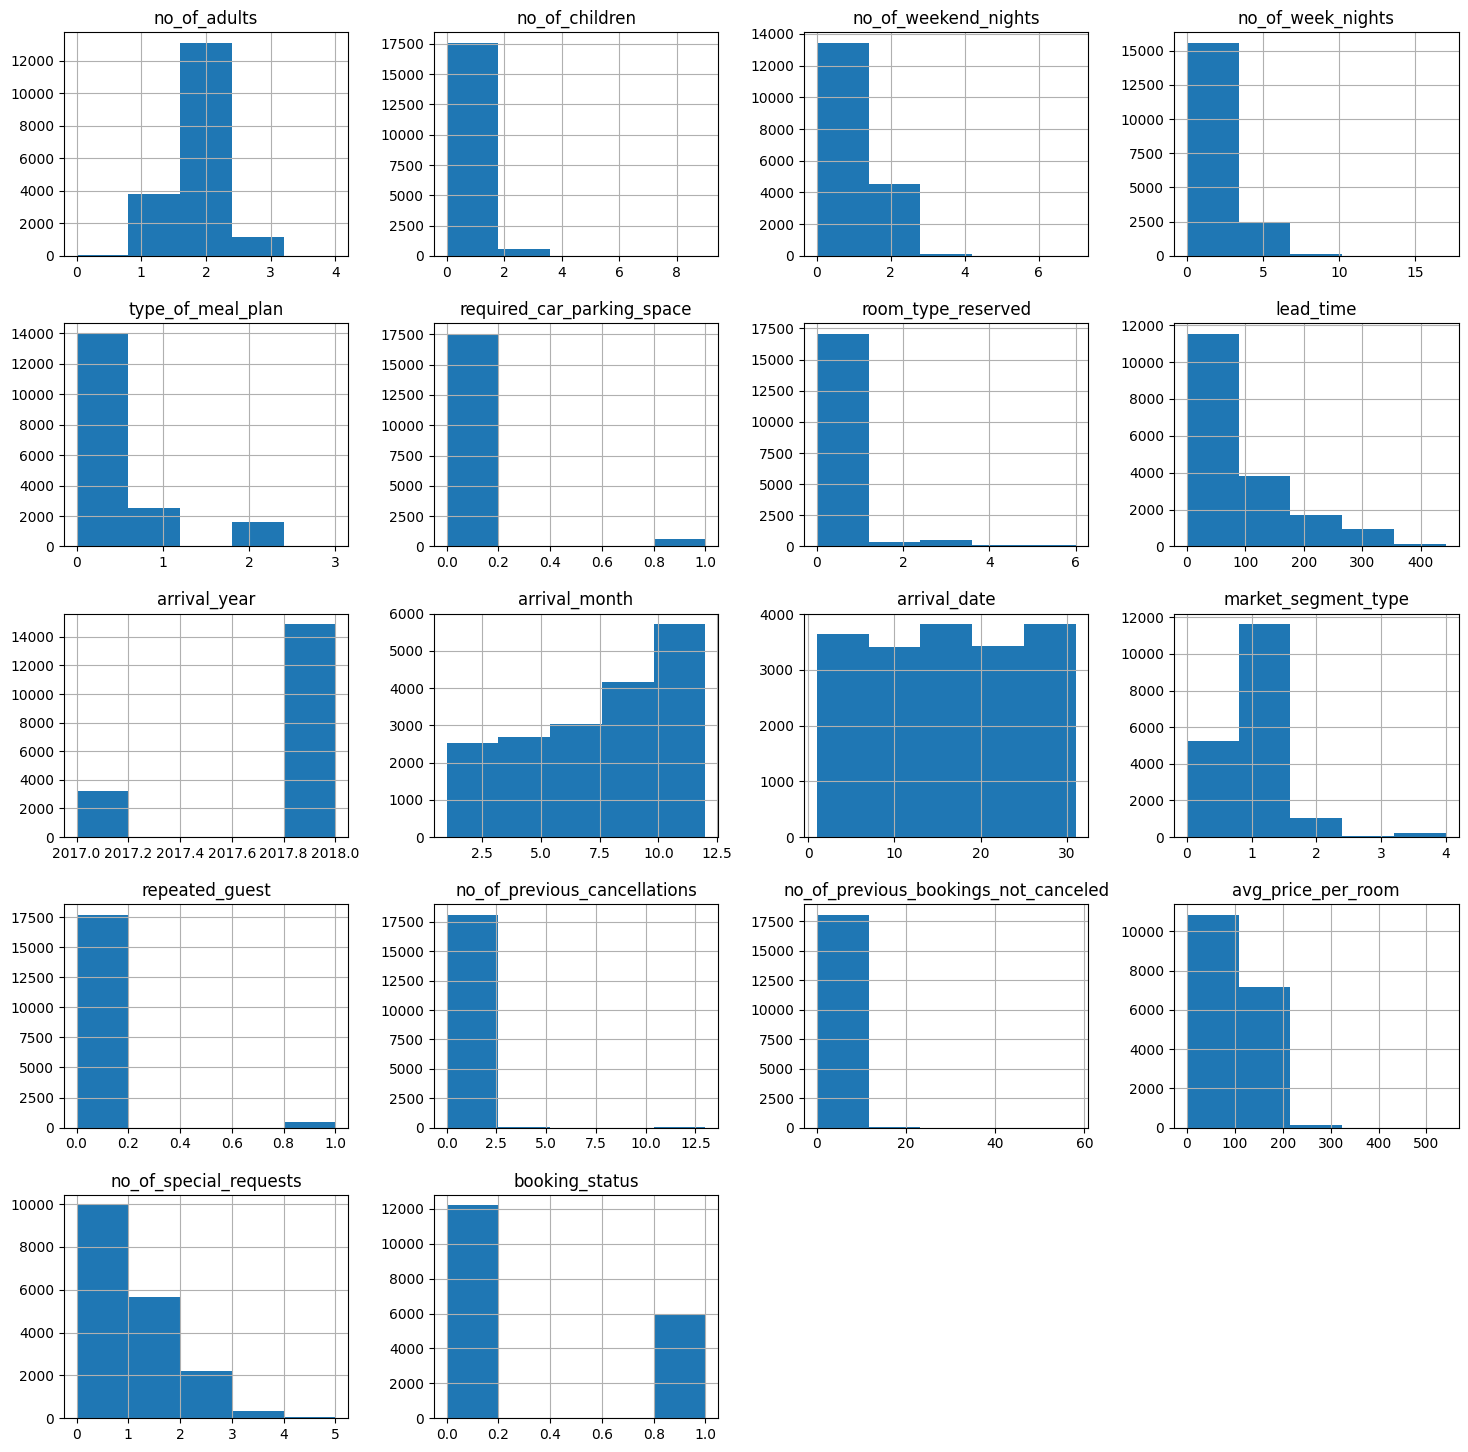

In [10]:
train.hist(bins = 5, figsize = (18,18))


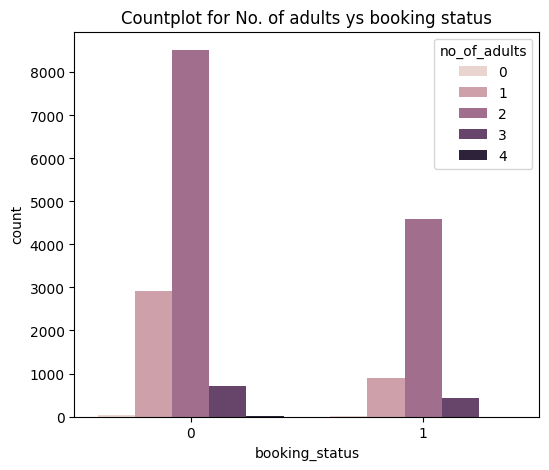

In [11]:
def countplot_of_2(x,hue,title=None, figsize=(6,5)):
  plt.figure(figsize=figsize)
  sns.countplot(data=train[[x, hue]],x=x, hue=hue)
  plt.title(title)
  plt.show()
countplot_of_2('booking_status','no_of_adults', 'Countplot for No. of adults ys booking status')

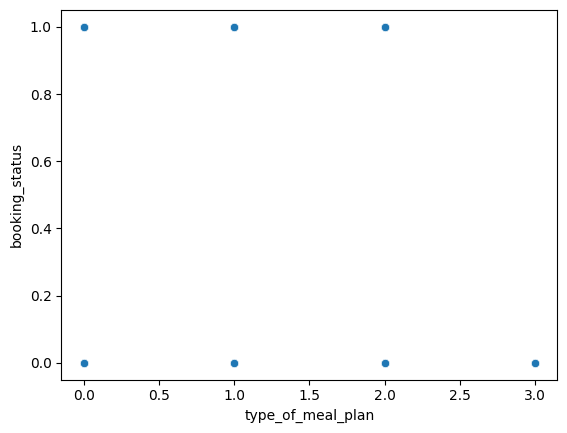

In [12]:
sns.scatterplot(data = train, x = "type_of_meal_plan", y = "booking_status")
plt.show()

In [13]:
corr = train.corr()
corr.style.background_gradient('coolwarm')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.017565,0.098241,0.103135,0.025139,0.010956,0.163542,0.098254,0.077915,0.018254,0.028433,-0.098518,-0.198334,-0.043494,-0.119703,0.292910,0.179970,0.094354
no_of_children,-0.017565,1.000000,0.026761,0.018957,-0.066445,0.026409,0.484223,-0.051646,0.044164,0.008244,0.020804,0.078264,-0.037868,-0.015580,-0.021495,0.342425,0.128325,0.035093
no_of_weekend_nights,0.098241,0.026761,1.000000,0.188796,-0.048357,-0.029054,0.044741,0.047559,0.054914,-0.010060,0.024026,-0.011626,-0.058549,-0.015543,-0.018829,-0.005837,0.057814,0.061117
no_of_week_nights,0.103135,0.018957,0.188796,1.000000,-0.076067,-0.054087,0.066756,0.148348,0.037240,0.044170,-0.007471,-0.060650,-0.094936,-0.024761,-0.041108,0.029326,0.037413,0.096472
type_of_meal_plan,0.025139,-0.066445,-0.048357,-0.076067,1.000000,-0.021426,-0.146645,0.134350,-0.083469,0.019607,0.019243,-0.156242,-0.068313,-0.018854,-0.042258,0.039359,-0.054258,0.076685
required_car_parking_space,0.010956,0.026409,-0.029054,-0.054087,-0.021426,1.000000,0.031255,-0.076608,0.006502,-0.018159,-0.008735,0.109336,0.116001,0.027336,0.062674,0.062199,0.083360,-0.092640
room_type_reserved,0.163542,0.484223,0.044741,0.066756,-0.146645,0.031255,1.000000,-0.088265,0.073680,0.003517,0.030617,0.165417,-0.006948,-0.001362,-0.001447,0.411577,0.121888,0.021723
lead_time,0.098254,-0.051646,0.047559,0.148348,0.134350,-0.076608,-0.088265,1.000000,0.148482,0.140062,0.012856,-0.312090,-0.135079,-0.042747,-0.078664,-0.069985,-0.103707,0.434314
arrival_year,0.077915,0.044164,0.054914,0.037240,-0.083469,0.006502,0.073680,0.148482,1.000000,-0.343696,0.008437,0.083831,-0.018765,0.006593,0.025689,0.184786,0.048557,0.183256
arrival_month,0.018254,0.008244,-0.010060,0.044170,0.019607,-0.018159,0.003517,0.140062,-0.343696,1.000000,-0.034861,-0.038777,-0.004458,-0.040632,-0.015225,0.053381,0.103389,-0.011472


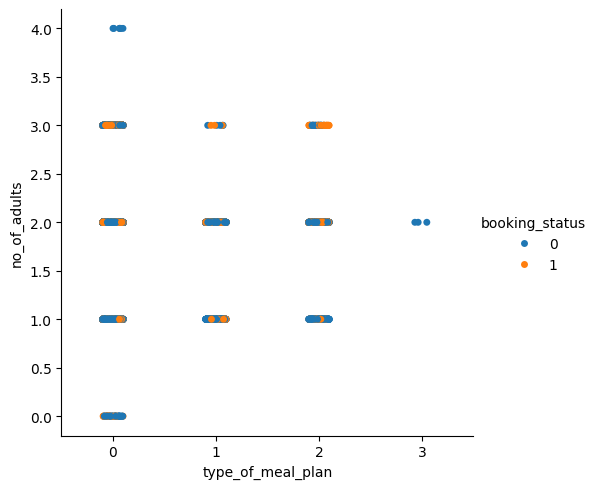

In [14]:
sns.catplot(data = train, x = "type_of_meal_plan", y = "no_of_adults",hue="booking_status")
plt.show()


In [15]:
x = train.drop('booking_status',axis = 1)
y = train['booking_status']

In [16]:
train['booking_status'].value_counts()


0    12195
1     5942
Name: booking_status, dtype: int64

In [17]:
from imblearn import over_sampling
os = over_sampling.RandomOverSampler()
x,y = os.fit_resample(x,y)
y.value_counts()


0    12195
1    12195
Name: booking_status, dtype: int64

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2)

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
svm = SVC()
svm.fit(x_train,y_train)


SVC()

In [21]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [22]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [26]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_val, classifier.predict(x_val))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt='')
    y_pred = classifier.predict(x_val)
    yt_pred = classifier.predict(x_train)
    print('The Training Accuracy of the algorithm is', accuracy_score(y_train, yt_pred))
    print('The Validation Accuracy of the algorithm is', accuracy_score(y_val, y_pred))
    return [(accuracy_score(y_train * 100, yt_pred * 100) * 100), (accuracy_score(y_val* 100, y_pred * 100) * 100), f1_score(y_val,y_pred)]

The Training Accuracy of the algorithm is 0.8645961459614596
The Validation Accuracy of the algorithm is 0.7956129561295613


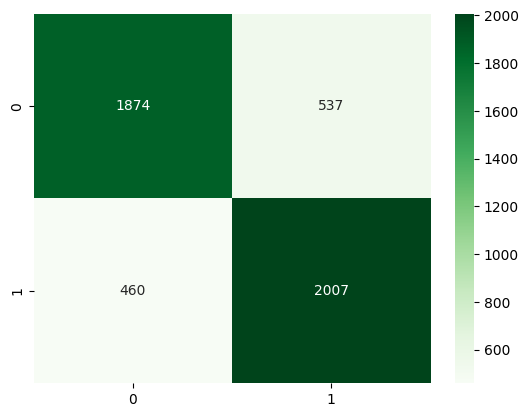

In [27]:
knn_r = model_evaluation(knn)

The Training Accuracy of the algorithm is 0.6927019270192702
The Validation Accuracy of the algorithm is 0.6859368593685937


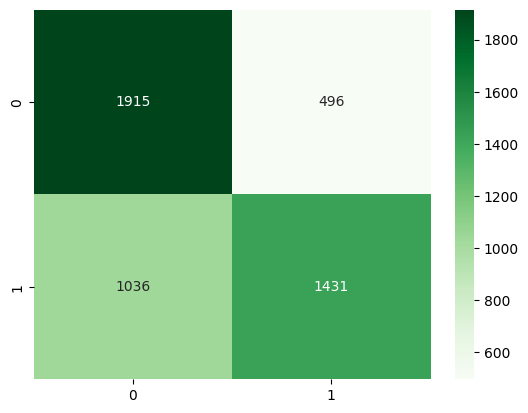

In [28]:
svm_r = model_evaluation(svm)

The Training Accuracy of the algorithm is 0.5575030750307504
The Validation Accuracy of the algorithm is 0.5656006560065601


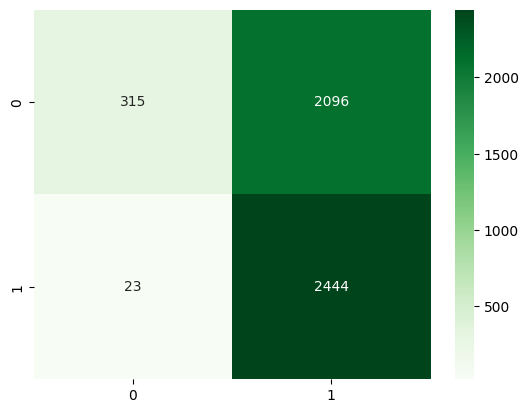

In [29]:
gnb_r = model_evaluation(gnb)

The Training Accuracy of the algorithm is 0.7662976629766297
The Validation Accuracy of the algorithm is 0.7621976219762198


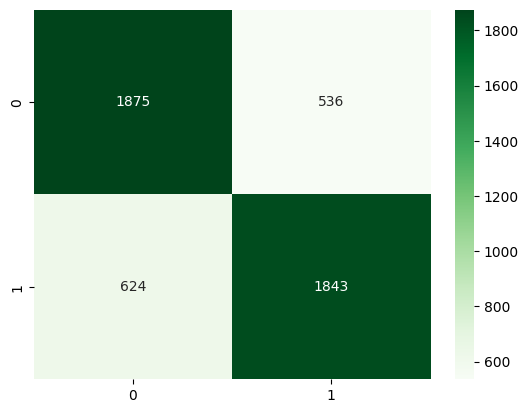

In [30]:
lr_r = model_evaluation(lr)

The Training Accuracy of the algorithm is 0.9956437064370643
The Validation Accuracy of the algorithm is 0.9141041410414105


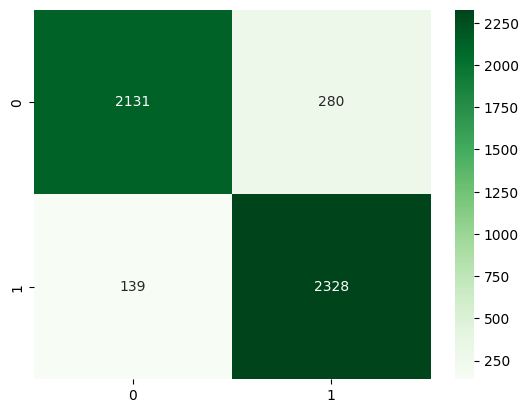

In [31]:
dt_r = model_evaluation(dt)

The Training Accuracy of the algorithm is 0.9956437064370643
The Validation Accuracy of the algorithm is 0.9403444034440345


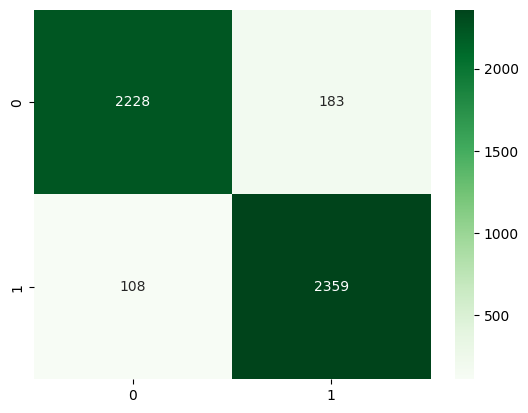

In [32]:
rf_r = model_evaluation(rf)

The Training Accuracy of the algorithm is 0.8278495284952849
The Validation Accuracy of the algorithm is 0.8228782287822878


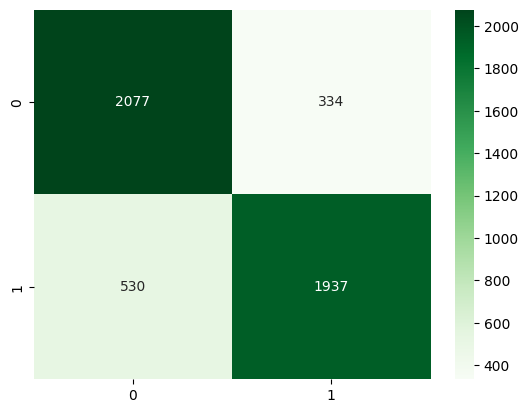

In [33]:
gb_r = model_evaluation(gb)

In [34]:
results = pd.DataFrame(data = [knn_r, svm_r, gnb_r, lr_r, dt_r, rf_r, gb_r], columns = ['Training Accuracy', 'Validation Accuracy', 'F1 Score'], index = ['K Nearest Neighbors', 'Support Vector Machines', 'Naive Bayes', 'Logistic Regression',
'Decision Tree', 'Random Forest', 'Gradient Boost'])

In [35]:
results

,Training Accuracy,Validation Accuracy,F1 Score
K Nearest Neighbors,86.459615,79.561296,0.801038
Support Vector Machines,69.270193,68.593686,0.651343
Naive Bayes,55.750308,56.560066,0.697588
Logistic Regression,76.629766,76.219762,0.760627
Decision Tree,99.564371,91.410414,0.917438
Random Forest,99.564371,94.034440,0.941905
Gradient Boost,82.784953,82.287823,0.817645


In [36]:
fi = rf.feature_importances_

In [37]:
col = train.columns

In [38]:
feat_imp = {}
for i,j in zip(fi,col):
    feat_imp[j] = i

In [39]:
feat_imp

{'no_of_adults': 0.02398821037851306,
 'no_of_children': 0.00734985690876349,
 'no_of_weekend_nights': 0.03896547135695617,
 'no_of_week_nights': 0.05213122618598988,
 'type_of_meal_plan': 0.0200934264527486,
 'required_car_parking_space': 0.009075157214406299,
 'room_type_reserved': 0.01731167876192376,
 'lead_time': 0.3069661218259617,
 'arrival_year': 0.028103598880430194,
 'arrival_month': 0.0859470514992643,
 'arrival_date': 0.0890998988835315,
 'market_segment_type': 0.056571352793432096,
 'repeated_guest': 0.0034125014111199515,
 'no_of_previous_cancellations': 0.0002838694741203905,
 'no_of_previous_bookings_not_canceled': 0.0019303526195644282,
 'avg_price_per_room': 0.15153314934484888,
 'no_of_special_requests': 0.1072370760084254}

In [40]:
def model_evaluation1(rf, x_train, x_val, y_train, y_val, num_features):

    rf.fit(x_train, y_train)
    y_train_pred = rf.predict(x_train)
    y_val_pred = rf.predict(x_val)

    # Calculate performance metrics
    training_accuracy = accuracy_score(y_train, y_train_pred)
    validation_accuracy = accuracy_score(y_val, y_val_pred)

    # Return a dictionary of performance metrics
    metrics = {
        'Number of features': num_features,
        'Training Accuracy': training_accuracy,
        'Validation Accuracy': validation_accuracy
    }

    return metrics



In [41]:
rfc_results = []
for main in [0.03,0.025,0.020,0.014, 0.008]:
    to_drop = []
    for i,j in zip(feat_imp.keys(), feat_imp.values()):
            if j < main:
               to_drop.append(i)

    X_new = x.drop(to_drop, axis = 1)
    y_new = y
    X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2,random_state= 42)
    rfc_new = RandomForestClassifier()
    rfc_new.fit(X1_train, y1_train)
    temp1 = model_evaluation1(rfc_new,X1_train, X1_val, y1_train, y1_val, X1_train.shape[1])
    rfc_results.append(temp1)

In [42]:
rfc_results

[{'Number of features': 8,
  'Training Accuracy': 0.9951824518245183,
  'Validation Accuracy': 0.9272242722427224},
 {'Number of features': 9,
  'Training Accuracy': 0.9951824518245183,
  'Validation Accuracy': 0.9298892988929889},
 {'Number of features': 11,
  'Training Accuracy': 0.9955412054120542,
  'Validation Accuracy': 0.9352193521935219},
 {'Number of features': 12,
  'Training Accuracy': 0.9955412054120542,
  'Validation Accuracy': 0.9360393603936039},
 {'Number of features': 13,
  'Training Accuracy': 0.9955412054120542,
  'Validation Accuracy': 0.9354243542435424}]

In [43]:
randomf = pd.DataFrame(data = rfc_results,columns=['Number of features', 'Training Accuracy', 'Validation Accuracy'])

In [44]:
randomf

,Number of features,Training Accuracy,Validation Accuracy
0,8,0.995182,0.927224
1,9,0.995182,0.929889
2,11,0.995541,0.935219
3,12,0.995541,0.936039
4,13,0.995541,0.935424


In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {

"max_features" : [None, 6,7,8],

"max_depth": [None,13, 15]

}

from sklearn.model_selection import KFold

gdcv = GridSearchCV(estimator=rf,param_grid=parameters)

In [46]:
gdcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 13, 15],
                         'max_features': [None, 6, 7, 8]})

In [47]:
gdcv.best_params_

{'max_depth': None, 'max_features': 6}

In [48]:
rf_new = RandomForestClassifier(max_depth = 15, max_features = 6)

In [49]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_features=6)

The Training Accuracy of the algorithm is 0.9461357113571136
The Validation Accuracy of the algorithm is 0.9124641246412464


[94.61357113571137, 91.24641246412463, 0.9135452520753189]

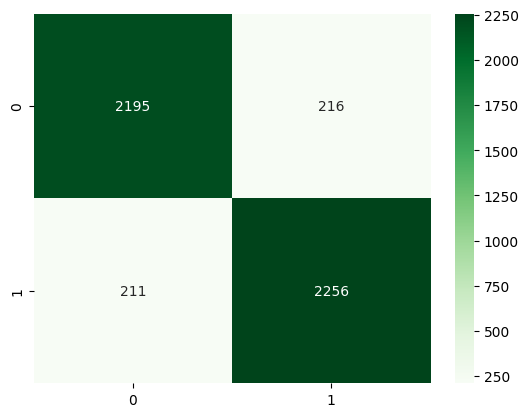

In [50]:
model_evaluation(rf_new)

In [51]:
pred = rf_new.predict(x_val)

In [52]:
pred

array([0, 1, 0, ..., 1, 0, 1])

In [53]:
pd.DataFrame({'Original':y_val, 'predicted': pred})

,Original,predicted
8149,0,0
23301,1,1
7851,0,0
18288,1,1
12902,0,0
...,...,...
15207,0,0
2998,1,1
9509,1,1
5066,0,0


In [54]:
pickle.dump(rf_new,open('/content/drive/MyDrive/Major Project/Training/model.pkl','wb'))